# Predicting Fashion Items with CNN
* Preprocess the data
* train_test_split
* Generate and augment the data
* Simple CNN modeling
* Model evaluation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 

In [2]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
print(train.shape)
train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
print(train.shape)
train.head()


(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_arr = np.array(train, dtype='float32')
test_arr = np.array(test, dtype='float32')

## Data Preprocessing

In [5]:
def preprocess(arr):
    x = arr[:, 1:]/255.0
    y = arr[:, 0]
    
    return x, y

In [6]:
X_train, y_train = preprocess(train_arr)

In [7]:
X_test, y_test = preprocess(test_arr)

## Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=36)

## Data Generation & Augmentation

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [12]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

## Modeling with CNN

In [13]:
model = Sequential()

# First layer
model.add(Conv2D(128, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second layer
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10, activation='softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 512)         1

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(lr=0.0003),
             metrics=['accuracy'])

## Training

In [15]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 64),
                    steps_per_epoch = len(X_train) // 64, 
                    epochs = 5, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/5
750/750 [==============================] - 19s 26ms/step - loss: 1.1003 - accuracy: 0.5919 - val_loss: 0.6000 - val_accuracy: 0.7678
Epoch 2/5
750/750 [==============================] - 19s 26ms/step - loss: 0.6382 - accuracy: 0.7610 - val_loss: 0.5851 - val_accuracy: 0.7845
Epoch 3/5
750/750 [==============================] - 20s 27ms/step - loss: 0.5415 - accuracy: 0.7981 - val_loss: 0.4226 - val_accuracy: 0.8388
Epoch 4/5
750/750 [==============================] - 19s 26ms/step - loss: 0.4762 - accuracy: 0.8266 - val_loss: 0.3466 - val_accuracy: 0.8721
Epoch 5/5
750/750 [==============================] - 19s 26ms/step - loss: 0.4331 - accuracy: 0.8449 - val_loss: 0.3458 - val_accuracy: 0.8788


In [16]:
# Save the model
model.save('my_model.h5')

## Evaluation

In [17]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3304 - accuracy: 0.8819


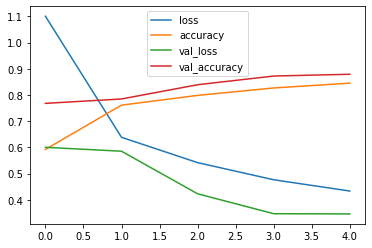

In [18]:
pd.DataFrame(history.history).plot()

## Prediction

In [19]:
pred = model.predict(X_test)

In [20]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred = np.argmax(pred, axis=1)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83      1000
         1.0       0.98      0.99      0.98      1000
         2.0       0.83      0.81      0.82      1000
         3.0       0.89      0.93      0.91      1000
         4.0       0.79      0.85      0.82      1000
         5.0       0.92      0.97      0.95      1000
         6.0       0.68      0.66      0.67      1000
         7.0       0.91      0.92      0.91      1000
         8.0       0.97      0.98      0.98      1000
         9.0       0.98      0.91      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Prediction Visualization

In [22]:
import matplotlib.pyplot as plt

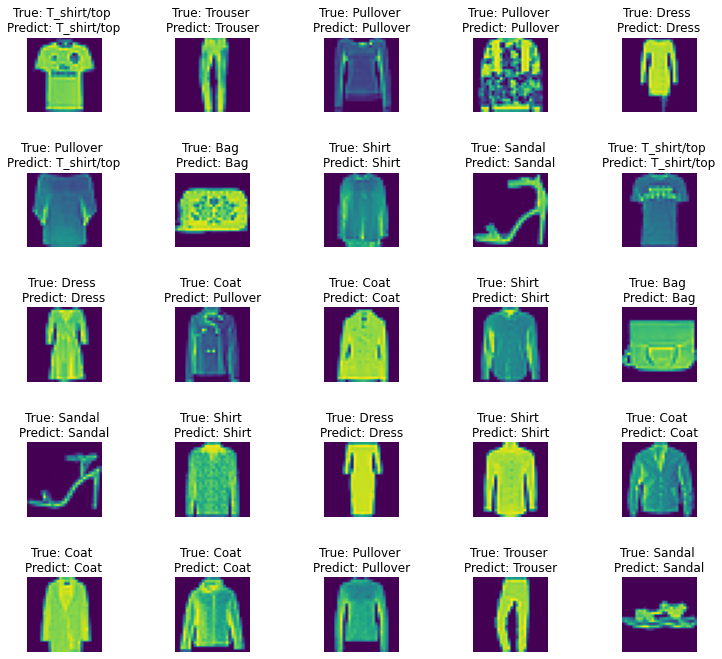

In [23]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(25):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('True: %s \nPredict: %s' % (class_names[int(y_test[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

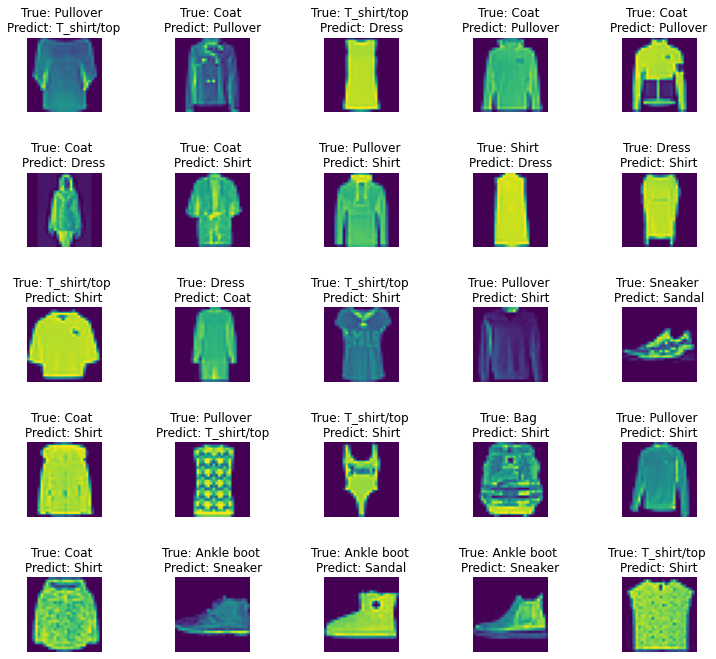

In [24]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

miss_pred = np.where(y_pred != y_test)[0]
for i in np.arange(25):
    axes[i].imshow(X_test[miss_pred[i]].reshape(28,28))
    axes[i].set_title('True: %s \nPredict: %s' % (class_names[int(y_test[miss_pred[i]])],
                                                 class_names[y_pred[miss_pred[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)